# TS2 - Camila Belen Smith
## Respuesta en frecuencia de Filtros Pasivos RLC

1) Hallar analíticamente la función de transferencia  H(s)=Vo(s)Vi(s)
 
2) Calcular y graficar la respuesta de módulo y fase, indicando la respuesta asintótica donde corresponda.

3) Responda: ¿De qué tipo de filtro se trata? ¿Cuál es el ancho de banda del filtro?

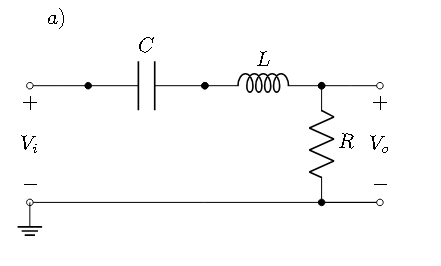

In [33]:
from IPython.display import Image
import os
Image(filename=os.path.join(r"C:\Users\Notebook\Desktop\Smith APS\APS", "imagen 1.png"))

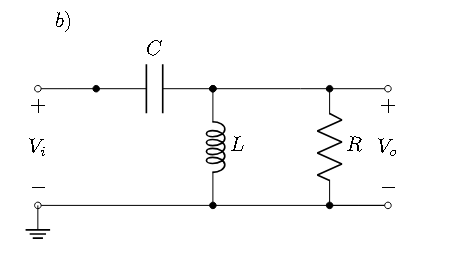

In [34]:
Image(filename=os.path.join(r"C:\Users\Notebook\Desktop\Smith APS\APS", "imagen 2.png"))

# Antes de responder las preguntas dejo unas notas para poder resolver el ejercicio:
La impedancias: 
- **Resistor $R$**$$ Z_R = R $$

- **Capacitor $C$**$$Z_C = \frac{1}{j\omega C}$$

- **Inductor $L$**$$Z_L = j\omega L$$

$Laplace$ : $  j\omega = S $  

### ¿Como se comportan las impedancias en Frecuencia extremas? 

$$
\lim_{\omega \to 0} Z_R = R, \quad \lim_{\omega \to \infty} Z_R = R
$$
- La impedancia del resistor no depende de la frecuencia.

---
$$
\lim_{\omega \to 0} Z_C = \infty, \quad \lim_{\omega \to \infty} Z_C = 0
$$
 
- A **baja frecuencia**, la impedancia del capacitor es muy alta $\rightarrow$  **circuito abierto**. (no fluye $I$)
- A **alta frecuencia**, la impedancia tiende a cero $\rightarrow$ **cortocircuito**. (fluye $I$ en exeso)

---
$$
\lim_{\omega \to 0} Z_L = 0, \quad \lim_{\omega \to \infty} Z_L = \infty
$$
- A **baja frecuencia** , la impedancia del inductor es muy baja $\rightarrow$ **cortocircuito**.  
- A **alta frecuencia** , la impedancia del inductor es muy alta $\rightarrow$ **circuito abierto**.


### Ejercicio 1


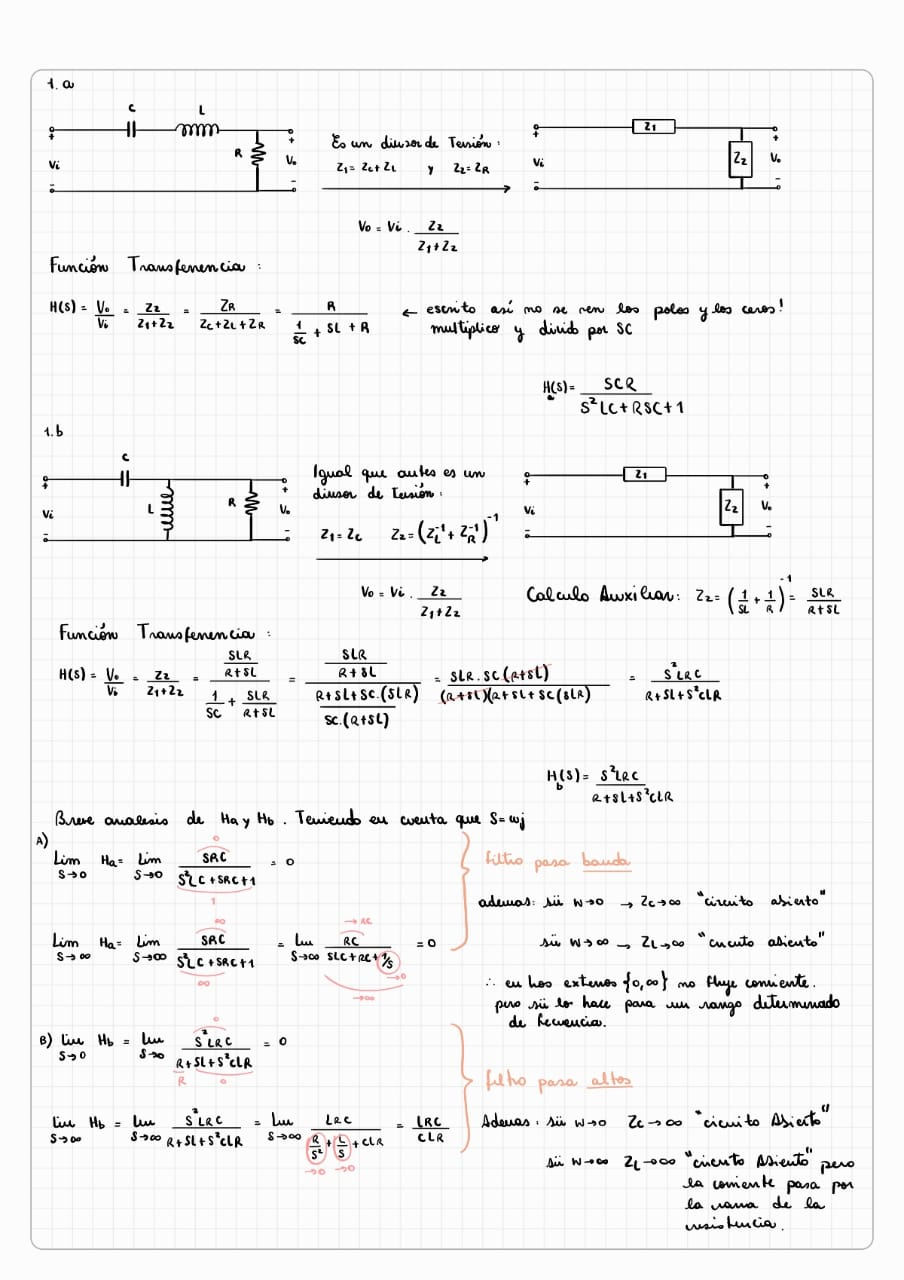

In [35]:
Image(filename=r'C:\Users\Notebook\Desktop\Smith APS\Resolucion analitica.jpeg')

En conclusion:

$ H_a(s) = \frac{SRC}{S^2 LC + S RC + 1} $
$ H_b(s) = \frac{S^2 RLC}{S^2 RLC + S L + R} $

### Ejercicio 2

Recordando que $S=jw$ por Laplace, el modulo de la transferencia resulta ser para cada caso:

$|H_a(wj)| = \frac{R}{\sqrt{R^2 + \left(\omega L - \frac{1}{\omega L}\right)^2}}$
$|H_b(wj)| = \frac{\omega^2 LRC}{\sqrt{(R - \omega^2 RLC)^2 + (\omega L)^2}}$

Para calcular la Fase debo separar en parte real e imaginaria de tal forma que $ H(jw) = a + j b $ ya que $arg(H)= arctg(b/a)$ teniendo en cuenta los signos de $a$ y $b$ ppara ubicarlo correctamente en el cuadrante.



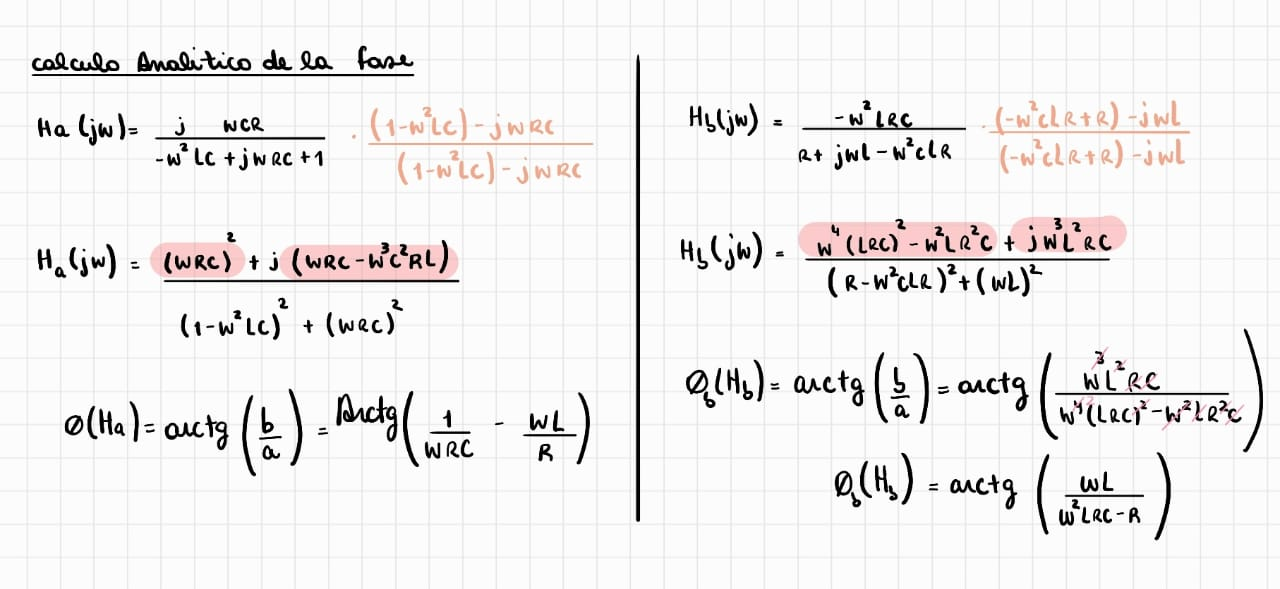

In [37]:
Image(filename=r'C:\Users\Notebook\Downloads\WhatsApp Image 2025-03-16 at 20.33.51.jpeg')

En limpio: 

$\phi (H_a) = arctg(\frac{1}{\omega R C } - \frac{\omega L }{R } )$

$\phi (H_b) = arctg (\frac{\omega L}{\omega^2 L R C  - R })$

Ahora voy a graficar:
Para graficar considere lo siguiente:
- El eje x lo escribi en funcion de la Frecuencia (Hz) : $ w = 2 \pi f $
  
$|H_a(f)| = \frac{R}{\sqrt{R^2 + \left(2 \pi f L - \frac{1}{2 \pi f L}\right)^2}}$
$|H_b(f)| = \frac{(2 \pi f)^2 LRC}{\sqrt{(R - (2 \pi f)^2 RLC)^2 + (2 \pi f L)^2}}$

- Tambien lo hice en escala Logaritmica para que se vea mejor
- Agregue en linea punteada el siguiente analisis:
  
$\lim_{f \to 0} |H_a(f)| = \lim_{f \to \infty} |H_a(f)| = 0$

$\lim_{f \to 0} |H_b(f)| = 0  \not=  \lim_{f \to \infty} |H_b(f)| = 1$

$\lim_{f \to 0} |\phi_a(f)| = \frac{\pi}{2} \not= \lim_{f \to \infty} |\phi_a(f)| = -\frac{\pi}{2}$

$\lim_{f \to 0} |\phi_b(f)| =  \lim_{f \to \infty} |\phi_b(f)| = 0 $




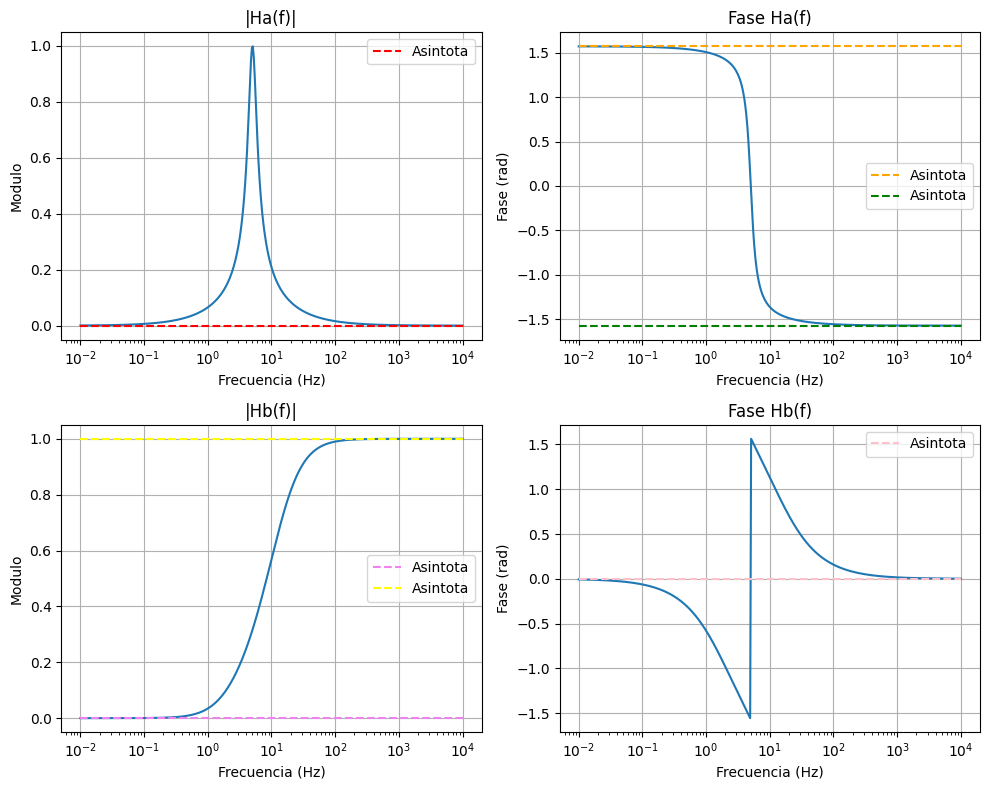

In [38]:
import numpy as np
import matplotlib.pyplot as plt

R=10
L=1
C=0.001
f=np.logspace(-2,4,400)
w=2*np.pi*f
Ha_mod=R/np.sqrt(R**2+(w*L-1/(w*C))**2)
Hb_mod=(w**2*L*R*C)/np.sqrt((R-w**2*L*R*C)**2+(w*L)**2)
Ha_fase=np.arctan(1/(w*R*C)-(w*L)/R)
Hb_fase=np.arctan(w*L/(w**2*L*R*C-R))

fig,axs=plt.subplots(2,2,figsize=(10,8))

axs[0,0].semilogx(f,Ha_mod)
axs[0,0].set_title('|Ha(f)|')
axs[0,0].set_xlabel('Frecuencia (Hz)')
axs[0,0].set_ylabel('Modulo')
axs[0,0].grid()
axs[0,0].plot(f,np.zeros_like(f),'r--',label='Asintota')
axs[0,0].legend()

axs[0,1].semilogx(f,Ha_fase)
axs[0,1].set_title('Fase Ha(f)')
axs[0,1].set_xlabel('Frecuencia (Hz)')
axs[0,1].set_ylabel('Fase (rad)')
axs[0,1].grid()
axs[0,1].plot(f,np.pi/2*np.ones_like(f),'orange',linestyle='--',label='Asintota')
axs[0,1].plot(f,-np.pi/2*np.ones_like(f),'green',linestyle='--',label='Asintota')
axs[0,1].legend()

axs[1,0].semilogx(f,Hb_mod)
axs[1,0].set_title('|Hb(f)|')
axs[1,0].set_xlabel('Frecuencia (Hz)')
axs[1,0].set_ylabel('Modulo')
axs[1,0].grid()
axs[1,0].plot(f,np.zeros_like(f),'violet',linestyle='--',label='Asintota')
axs[1,0].plot(f,np.ones_like(f),'yellow',linestyle='--',label='Asintota')
axs[1,0].legend()

axs[1,1].semilogx(f,Hb_fase)
axs[1,1].set_title('Fase Hb(f)')
axs[1,1].set_xlabel('Frecuencia (Hz)')
axs[1,1].set_ylabel('Fase (rad)')
axs[1,1].grid()
axs[1,1].plot(f,np.zeros_like(f),'pink',linestyle='--',label='Asintota')
axs[1,1].legend()

plt.tight_layout()
plt.show()

### Ejercicio 3:
¿De qué tipo de filtro se trata? ¿Cuál es el ancho de banda del filtro?

 A) Se trata de un **filtro pasa banda**. ¿Como me di cuenta? 
 - Viendo el circuito analice que para frecuencias bajas la impedancia del capacitor sube demaciado lo que produce un  **Circuito abierto** e impide el paso de la corriente. Para frecuencias muy altas lo que sube es la impedancia del inductor lo que tambien genera un  **Circuito abierto** e impide el paso de la corriente. Entonces para un determinado rango de frecuencias **SI** fluye corriente.
 - Viendo el grafico de $ |H_a| $ se ve claramente como el filtro atenua frecuecias muy bajas y frecuencias muy altas. Ademas, permite el paso de frecuencias dentro de un rango especifico.

¿Cuál es el ancho de banda del filtro? Para eso debo calcular las dos frecuencias de corte:
La $F_c $ es la frecuencia de corte, que es cuando la respuesta en frecuencia del filtro cae a $\frac{1}{\sqrt{2}}$ de su valor maximo.

$H_a(F_c) = \frac{1}{\sqrt{2}} \iff F_c1,2 = \frac{R + - \sqrt{R^2 +  \frac{1}{L C}}}{2 \pi L}$

El ancho de banda es la diferencia entre las dos frecuencias de corte, entonces:

$\Delta F = \frac{2 \sqrt{R^2 + 4}}{4 \pi L}$


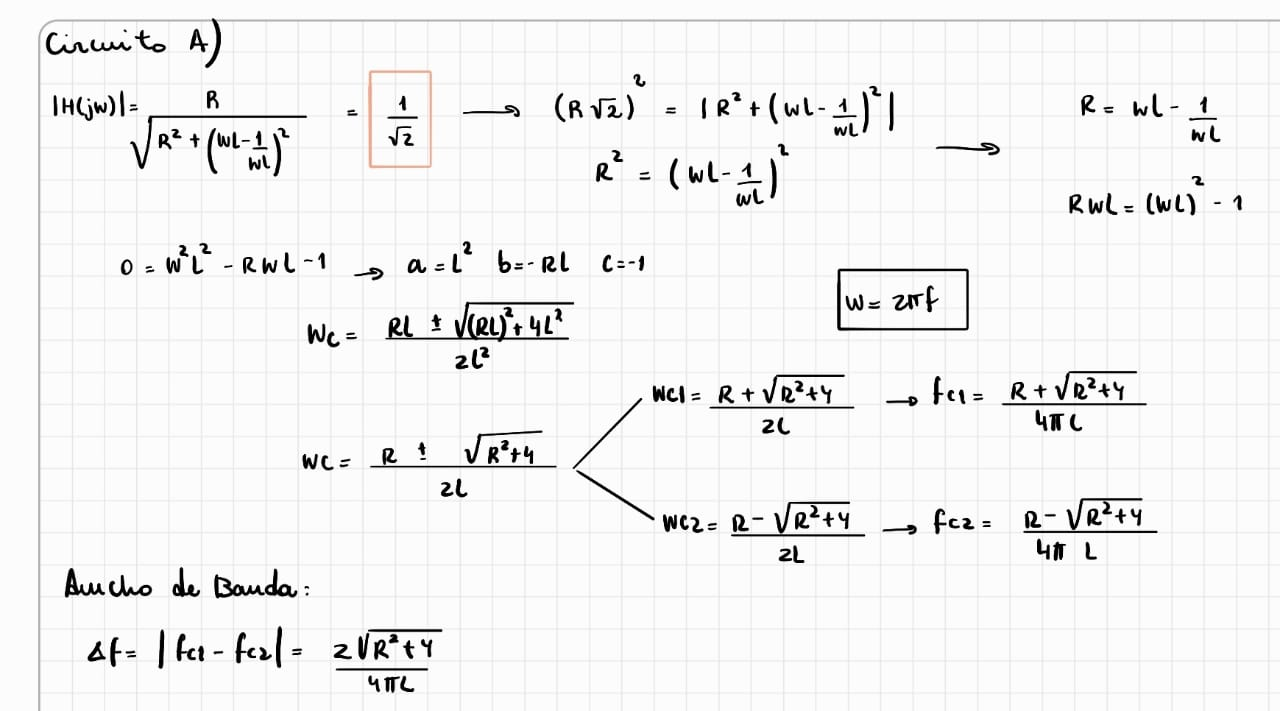

In [23]:
from IPython.display import Image
Image(filename=r'C:\Users\Notebook\Desktop\Smith APS\Ancho de banda A.jpeg')

 B) Se trata de un **filtro pasa altos**. ¿Como me di cuenta? 
 - Viendo el circuito analice que para frecuencias bajas la impedancia del capacitor sube demaciado lo que produce un  **Circuito abierto** e impide el paso de la corriente. Para frecuencias muy altas lo que sube es la impedancia del inductor lo que tambien genera un  **Circuito abierto** e impide el paso de la corriente. Sin embargo, la corriente puede circular por la rama de la resistencia. Por lo que para frecuencias altas si fluye la corriente. 
 - Viendo el grafico de $ |H_b| $ se ve claramente como el filtro atenua frecuecias muy bajas y deja pasar las altas.

¿Cuál es el ancho de banda del filtro? El ancho de banda del filtro tiene el siguiente rango $[F_c \  ; + \infty)$ y es infinito


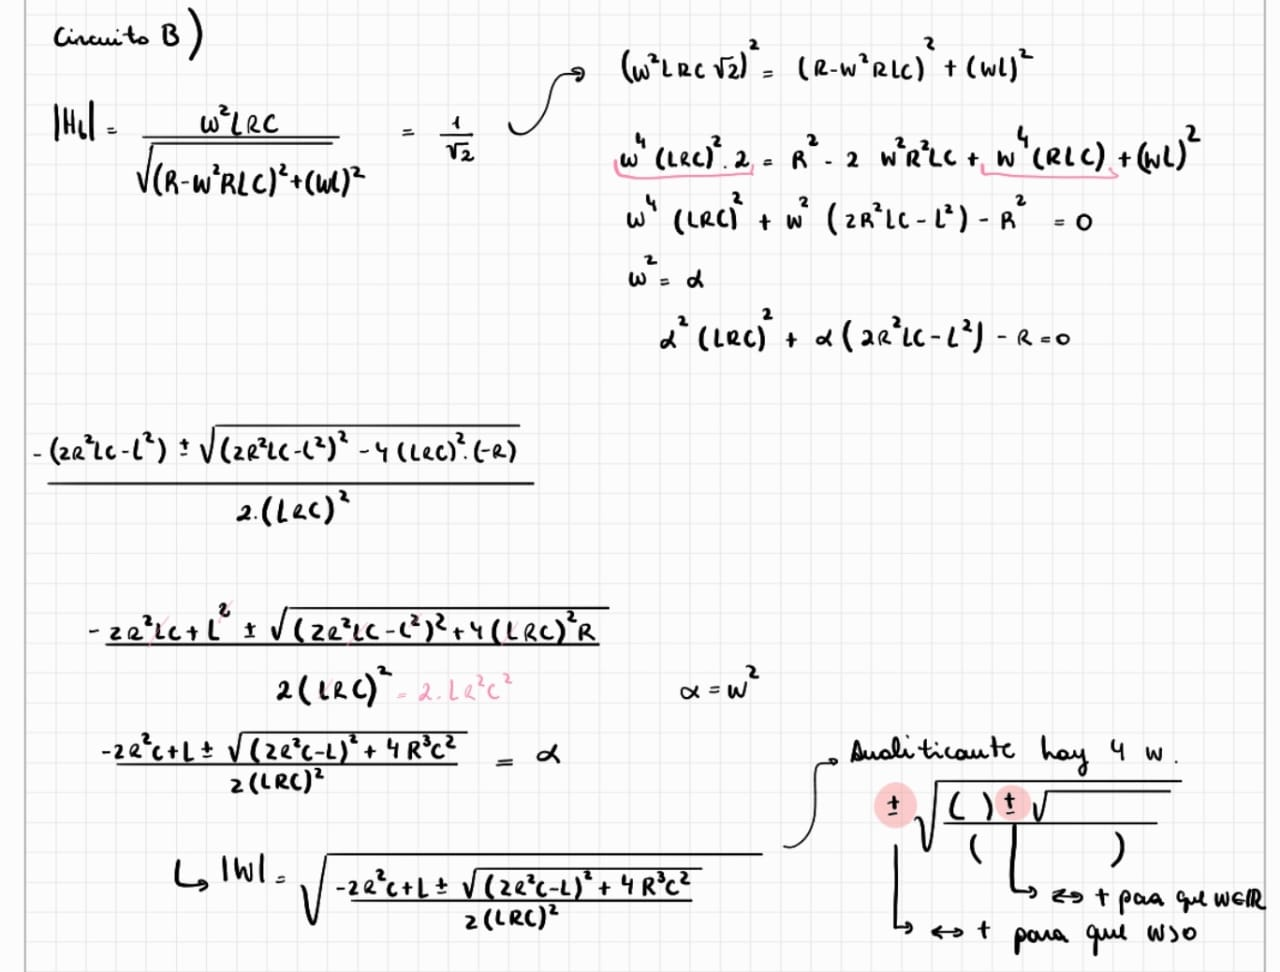

In [28]:
from IPython.display import Image
Image(filename=r'C:\Users\Notebook\Desktop\Smith APS\Ancho de banda B.jpeg')

En limpio: 
$H_b(F_c) = \frac{1}{\sqrt{2}} \iff F_c =\frac{1}{2\pi} \sqrt{\frac{-2R^2 + \sqrt{(2R^2 C - L)^2 + 4 R^3 C^2}}{2(LRC)^2}}
$


Relación de lo resueltos hasta ahora con los **3dB** vistos en clase:

sii al eje $y$ lo represento (para el caso de los gráficos de modulo) como 

$$
H_{dB} = 20 \log_{10}(H)
$$
$$
H(F_c) = \frac{1}{\sqrt{2}}
$$

$$
H_{dB} = 20 \log_{10} \left( \frac{1}{\sqrt{2}} \right)
$$

$$
H_{dB} = 20 \log_{10}(1) - 20 \log_{10}(\sqrt{2})
$$

$$
H_{dB} = 0 - 20 \times \frac{1}{2} \log_{10}(2)
$$

$$
H_{dB} = -3 \, \text{dB}
$$

En clase hablabamos de que veiamos que donde caida $-3dB$ se encontraba la frecuencia de corte, bueno es eso equivalente a trabajar con el Modulo sin el logaritmo pero con $ \frac{1}{\sqrt{2}} $

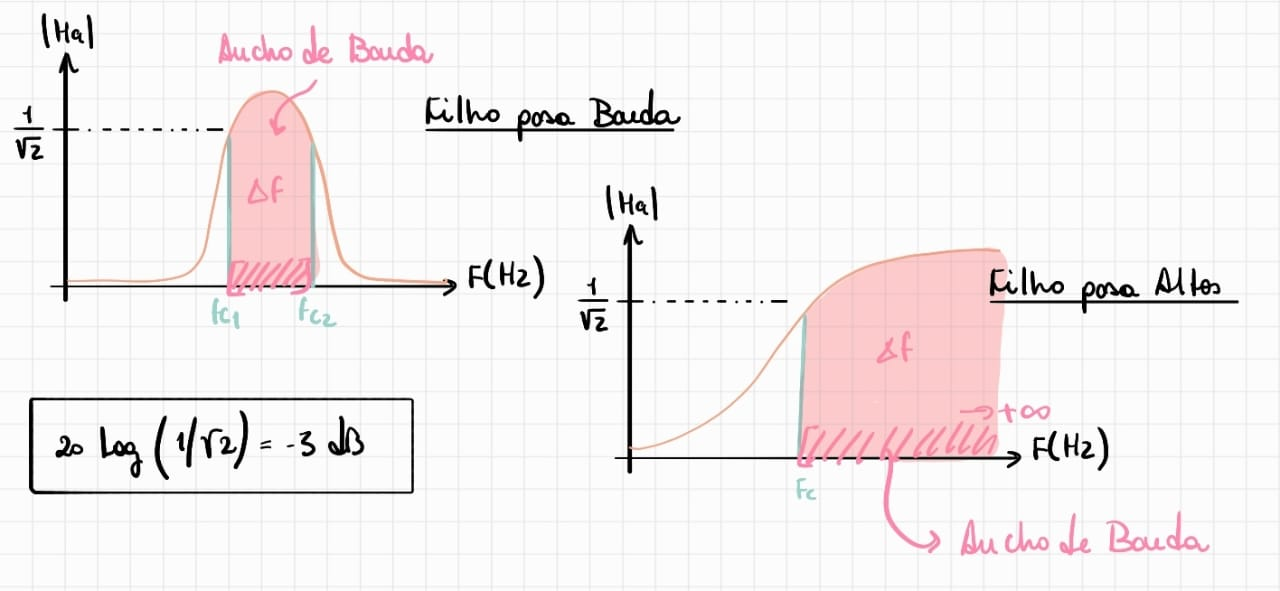

In [31]:
Image(filename=r'C:\Users\Notebook\Desktop\Smith APS\mii resumen.jpeg')

## BONUS

💎 Cómo calcularía la salida de cada filtro (en régimen permanente) si a Vi fuera una senoidal de frecuencia arbitraria f0.

🤯 ¿Cómo se podrían conectar en cascada ambos filtros y qué respuesta sería la resultante?

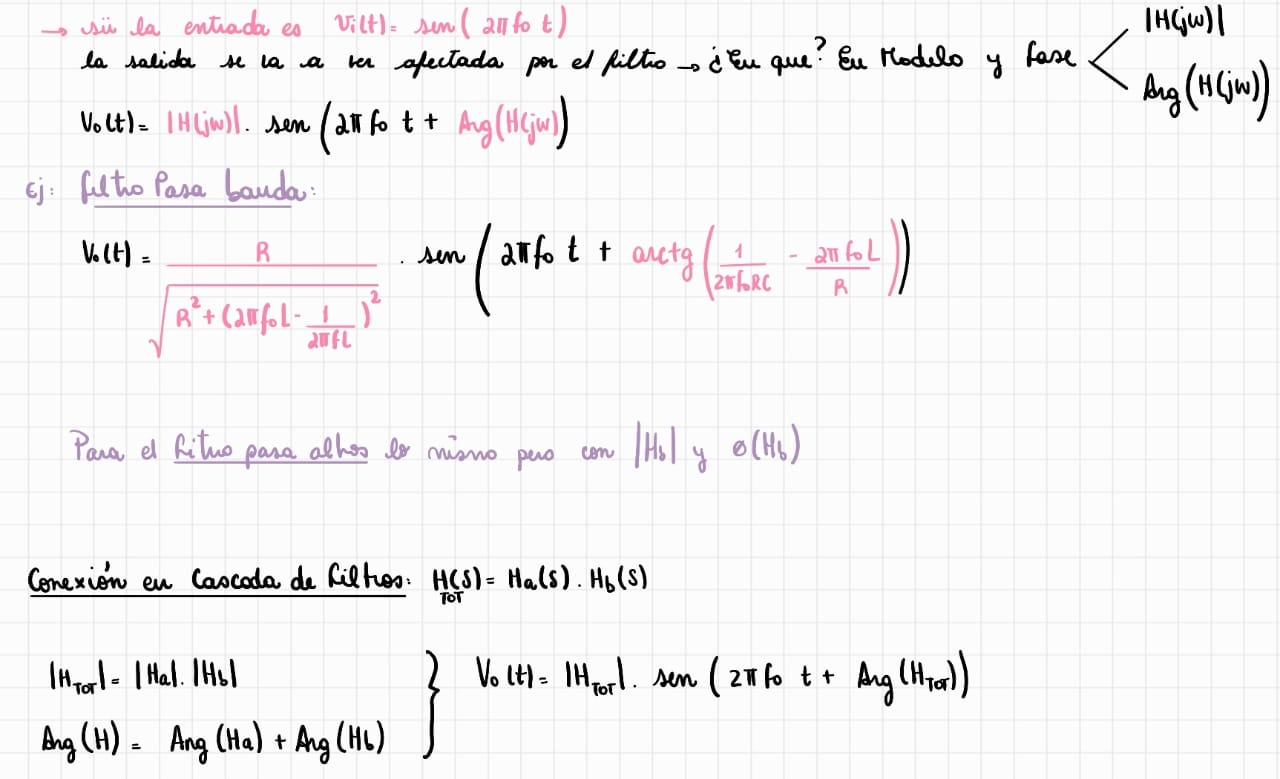

In [32]:
Image(filename=r'C:\Users\Notebook\Desktop\Smith APS\Bonus.jpeg')